In [1]:
import tensorflow as tf

In [3]:
from tensorflow.examples.tutorials.mnist import input_data

In [4]:
mnist = input_data.read_data_sets("MNIST_data/", one_hot = True)

W0914 22:51:14.385737 140704039585600 deprecation.py:323] From <ipython-input-4-1a516c502833>:1: read_data_sets (from tensorflow.contrib.learn.python.learn.datasets.mnist) is deprecated and will be removed in a future version.
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
W0914 22:51:14.387520 140704039585600 deprecation.py:323] From /home/shubhangi/anaconda3/lib/python3.7/site-packages/tensorflow/contrib/learn/python/learn/datasets/mnist.py:260: maybe_download (from tensorflow.contrib.learn.python.learn.datasets.base) is deprecated and will be removed in a future version.
Instructions for updating:
Please write your own downloading logic.
W0914 22:51:14.482838 140704039585600 deprecation.py:323] From /home/shubhangi/anaconda3/lib/python3.7/site-packages/tensorflow/contrib/learn/python/learn/datasets/mnist.py:262: extract_images (from tensorflow.contrib.learn.python.learn.datasets.mnist) is deprecated and will be removed in

Extracting MNIST_data/train-images-idx3-ubyte.gz


W0914 22:51:15.033611 140704039585600 deprecation.py:323] From /home/shubhangi/anaconda3/lib/python3.7/site-packages/tensorflow/contrib/learn/python/learn/datasets/mnist.py:267: extract_labels (from tensorflow.contrib.learn.python.learn.datasets.mnist) is deprecated and will be removed in a future version.
Instructions for updating:
Please use tf.data to implement this functionality.
W0914 22:51:15.063133 140704039585600 deprecation.py:323] From /home/shubhangi/anaconda3/lib/python3.7/site-packages/tensorflow/contrib/learn/python/learn/datasets/mnist.py:110: dense_to_one_hot (from tensorflow.contrib.learn.python.learn.datasets.mnist) is deprecated and will be removed in a future version.
Instructions for updating:
Please use tf.one_hot on tensors.
W0914 22:51:15.231509 140704039585600 deprecation.py:323] From /home/shubhangi/anaconda3/lib/python3.7/site-packages/tensorflow/contrib/learn/python/learn/datasets/mnist.py:290: DataSet.__init__ (from tensorflow.contrib.learn.python.learn.dat

Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [5]:
type(mnist)

tensorflow.contrib.learn.python.learn.datasets.base.Datasets

In [6]:
mnist.train.images.shape

(55000, 784)

In [7]:
mnist.train.num_examples

55000

In [8]:
mnist.test.num_examples

10000

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline

In [10]:
mnist.train.images[1].shape

(784,)

In [11]:
#change shape to 28,28
mnist.train.images[1].reshape(28,28)

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

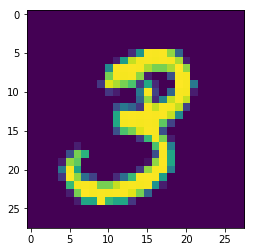

In [12]:
plt.imshow(mnist.train.images[1].reshape(28,28))

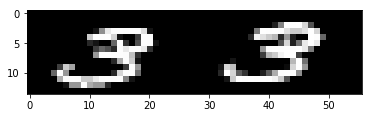

In [13]:
plt.imshow(mnist.train.images[1].reshape(14,56), cmap='gist_gray')

In [14]:
mnist.train.labels[1]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.])

In [15]:
#inputs
x= tf.placeholder(tf.float32, shape = [None, 784])

In [16]:
#weights, starting them off as zeros
W = tf.Variable(tf.zeros([784,10]))

In [17]:
#bias, adding one per class
b= tf.Variable(tf.zeros([10]))

In [18]:
#output
y = tf.matmul(x, W) + b

In [19]:
#loss and optimizer
y_true = tf.placeholder(tf.float32, shape =[None, 10])

In [20]:
#cross entropy, minimizing error between y_true and what we predict
#mathematics of running gradient optimizers and minimizing error
cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(labels= y_true, logits =y))

In [21]:
#optimizing, tuning learning rate, lower learning rate, time more, increases accuracy 
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.5)

In [22]:
train = optimizer.minimize(cross_entropy)
#optimizer is us trying to reduce the error and cross_entropy is us definining the error

In [25]:
#create and run a session
#initialises all variables and we need to run all the above in a tensorflow session
init = tf.global_variables_initializer()

In [26]:
with tf.Session() as sess:
    sess.run(init)
    
    # Train the model for 1000 steps on the training set
    # Using built in batch feeder from mnist for convenience
    
    #the range tells us how many times we want to feed the batches in, mnist object has a built in method for training batches 
    for step in range(1000):
        
        batch_x , batch_y = mnist.train.next_batch(100)
        
        sess.run(train,feed_dict={x:batch_x,y_true:batch_y})
        
    matches = tf.equal(tf.argmax(y,1),tf.argmax(y_true,1))
    
    acc = tf.reduce_mean(tf.cast(matches,tf.float32))
    
    print(sess.run(acc,feed_dict={x:mnist.test.images,y_true:mnist.test.labels}))

0.92
